In [38]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

In [39]:
import pandas as pd
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
df = pd.read_csv('AggregatedData.csv')

In [40]:
cols = ['Transaction Date','No Of Withdrawals']
df = df[cols]

In [41]:
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'])
print(df['Transaction Date'])

0       2011-01-01
1       2011-01-01
2       2011-01-01
3       2011-01-01
4       2011-01-01
           ...    
11584   2017-09-29
11585   2017-09-29
11586   2017-09-29
11587   2017-09-29
11588   2017-09-29
Name: Transaction Date, Length: 11589, dtype: datetime64[ns]


In [42]:
from datetime import datetime
con=df['Transaction Date']
df['Transaction Date']=pd.to_datetime(df['Transaction Date'])
df.set_index('Transaction Date', inplace=True)
#check datatype of index
df.index

DatetimeIndex(['2011-01-01', '2011-01-01', '2011-01-01', '2011-01-01',
               '2011-01-01', '2011-02-01', '2011-02-01', '2011-02-01',
               '2011-02-01', '2011-02-01',
               ...
               '2017-09-28', '2017-09-28', '2017-09-28', '2017-09-28',
               '2017-09-28', '2017-09-29', '2017-09-29', '2017-09-29',
               '2017-09-29', '2017-09-29'],
              dtype='datetime64[ns]', name='Transaction Date', length=11589, freq=None)

In [43]:
ts = df['No Of Withdrawals']
ts.head(10)

Transaction Date
2011-01-01     50
2011-01-01    253
2011-01-01     98
2011-01-01    265
2011-01-01     74
2011-02-01     17
2011-02-01    194
2011-02-01     67
2011-02-01    260
2011-02-01     80
Name: No Of Withdrawals, dtype: int64

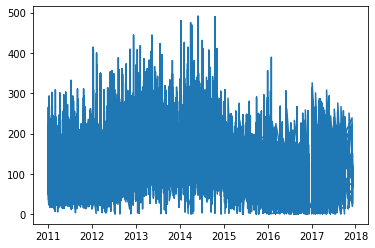

In [44]:
plt.plot(ts)

In [45]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
#     ts_log.rolling(12).mean()
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
#Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

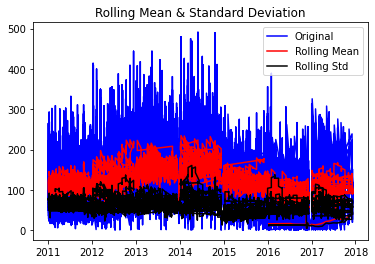

Results of Dickey-Fuller Test:
Test Statistic                -7.007025e+00
p-value                        7.078769e-10
#Lags Used                     3.900000e+01
Number of Observations Used    1.154900e+04
Critical Value (1%)           -3.430916e+00
Critical Value (5%)           -2.861790e+00
Critical Value (10%)          -2.566903e+00
dtype: float64


In [46]:
test_stationarity(ts)

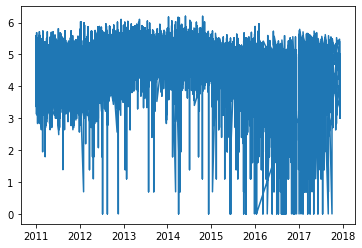

In [47]:
ts_log = np.log(ts)
plt.plot(ts_log)

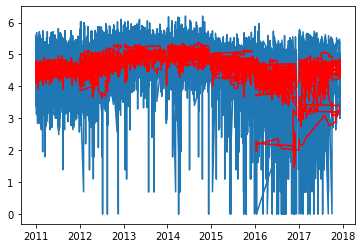

In [48]:
moving_avg = ts_log.rolling(12).mean()
plt.plot(ts_log)
plt.plot(moving_avg,color ='red')

In [49]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(12)
ts_log_moving_avg_diff.dropna(inplace= True)
ts_log_moving_avg_diff.head()

Transaction Date
2011-03-01    0.934829
2011-03-01    0.055901
2011-03-01    1.081232
2011-03-01    0.021925
2011-04-01   -0.962731
Name: No Of Withdrawals, dtype: float64

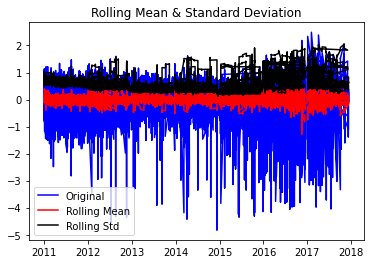

Results of Dickey-Fuller Test:
Test Statistic                   -23.572277
p-value                            0.000000
#Lags Used                        40.000000
Number of Observations Used    11537.000000
Critical Value (1%)               -3.430917
Critical Value (5%)               -2.861791
Critical Value (10%)              -2.566903
dtype: float64


In [50]:
test_stationarity(ts_log_moving_avg_diff)

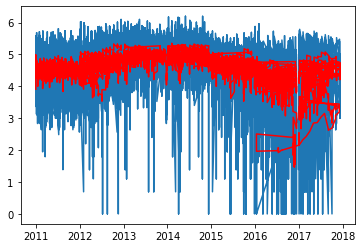

In [51]:
expweighted_avg = ts_log.ewm(span=12).mean()
plt.plot(ts_log)
plt.plot(expweighted_avg,color = 'red')

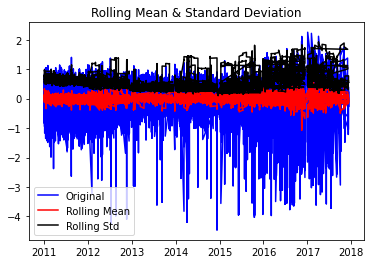

Results of Dickey-Fuller Test:
Test Statistic                   -22.165242
p-value                            0.000000
#Lags Used                        40.000000
Number of Observations Used    11548.000000
Critical Value (1%)               -3.430916
Critical Value (5%)               -2.861790
Critical Value (10%)              -2.566903
dtype: float64


In [52]:
ts_log_ewma_diff = ts_log - expweighted_avg
test_stationarity(ts_log_ewma_diff)

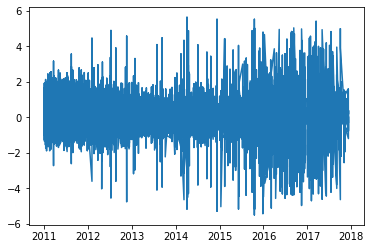

In [53]:
ts_log_diff  = ts_log -ts_log.shift()
plt.plot(ts_log_diff)

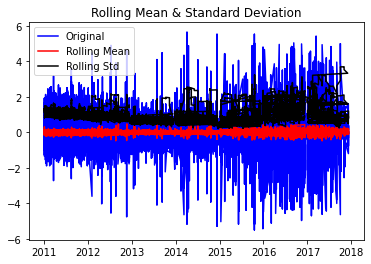

Results of Dickey-Fuller Test:
Test Statistic                   -25.429324
p-value                            0.000000
#Lags Used                        38.000000
Number of Observations Used    11549.000000
Critical Value (1%)               -3.430916
Critical Value (5%)               -2.861790
Critical Value (10%)              -2.566903
dtype: float64


In [54]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

Transaction Date
2011-01-01     50
2011-01-01    253
2011-01-01     98
2011-01-01    265
2011-01-01     74
             ... 
2017-09-29    137
2017-09-29     79
2017-09-29    117
2017-09-29     76
2017-09-29    143
Name: No Of Withdrawals, Length: 11589, dtype: int64


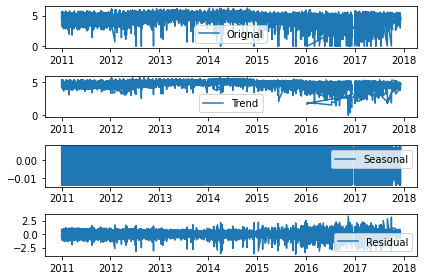

In [64]:
from statsmodels.tsa.seasonal import seasonal_decompose
print(ts)
ts_log = np.log(ts)
decomposition = seasonal_decompose(ts_log , period= 3)
trend  = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log,label = 'Orignal')
plt.legend(loc = 'best')

plt.subplot(412)
plt.plot(trend,label = 'Trend')
plt.legend(loc = 'best')

plt.subplot(413)
plt.plot(seasonal,label = 'Seasonal')
plt.legend(loc = 'best')

plt.subplot(414)
plt.plot(residual,label = 'Residual')
plt.legend(loc = 'best')

plt.tight_layout()

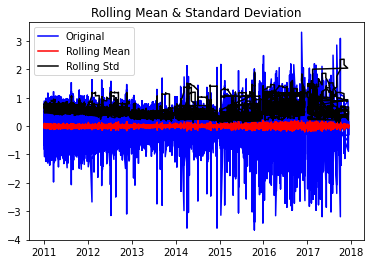

Results of Dickey-Fuller Test:
Test Statistic                   -36.584328
p-value                            0.000000
#Lags Used                        40.000000
Number of Observations Used    11546.000000
Critical Value (1%)               -3.430916
Critical Value (5%)               -2.861790
Critical Value (10%)              -2.566903
dtype: float64


In [65]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

C:\Users\t.rahul\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


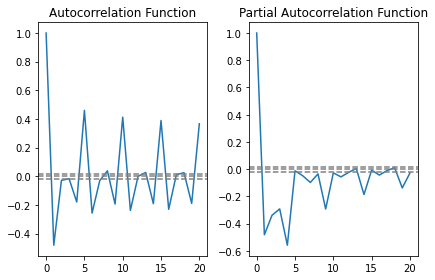

In [76]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import acf,pacf
lag_acf  = acf(ts_log_diff ,nlags=20)
lag_pacf  = pacf(ts_log_diff ,nlags=20 ,method='ols')


plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y = 0,linestyle='--',color = 'gray')
plt.axhline(y = -1.96/np.sqrt(len(ts_log_diff)),linestyle = '--',color ='gray')
plt.axhline(y = 1.96/np.sqrt(len(ts_log_diff)),linestyle = '--',color ='gray')
plt.title('Autocorrelation Function')


16 #Plot PACP:
plt.subplot(122)
plt.plot (lag_pacf)
plt.axhline(y=0,linestyle = '--',color = 'gray')
plt.axhline(y = -1.96/np.sqrt(len(ts_log_diff)),linestyle ='--',color = 'gray')
plt.axhline(y = 1.96/np.sqrt(len(ts_log_diff)),linestyle = '--',color = 'gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

C:\Users\t.rahul\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\t.rahul\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequ

Text(0.5, 1.0, 'RSS: 7785.4288')

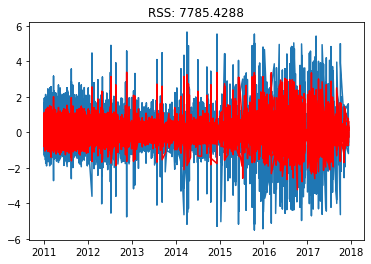

In [77]:
model = ARIMA(ts_log,order=(2,1,0))
results_AR = model.fit(disp = -1)
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues,color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))

C:\Users\t.rahul\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\t.rahul\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
C:\Users\t.rahul\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\t.rahul\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so w

Text(0.5, 1.0, 'RSS: 5590.0752')

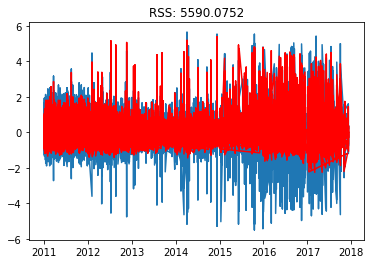

In [78]:
model = ARIMA(ts_log,order=(0,1,2))
results_MA = model.fit(disp = -1)
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues,color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))

C:\Users\t.rahul\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\t.rahul\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
C:\Users\t.rahul\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\t.rahul\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so w

Text(0.5, 1.0, 'RSS: 5472.0123')

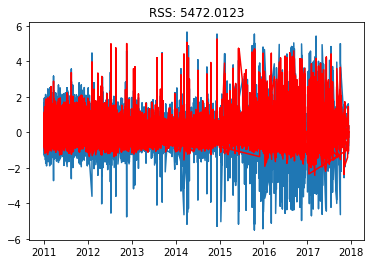

In [79]:
model = ARIMA(ts_log,order=(2,1,2))
results_ARIMA = model.fit(disp = -1)
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues,color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

In [80]:
prediction_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues ,copy =True)
prediction_ARIMA_diff.head()

Transaction Date
2011-01-01   -5.067723e-09
2011-01-01   -7.953598e-01
2011-01-01   -3.943969e-02
2011-01-01   -5.765947e-01
2011-02-01    3.325068e-01
dtype: float64

In [81]:
prediction_ARIMA_diff_cumsum = prediction_ARIMA_diff.cumsum()
prediction_ARIMA_diff_cumsum.head()

Transaction Date
2011-01-01   -5.067723e-09
2011-01-01   -7.953598e-01
2011-01-01   -8.347995e-01
2011-01-01   -1.411394e+00
2011-02-01   -1.078887e+00
dtype: float64

In [83]:
predictions_ARIMA_log = pd.Series(ts_log.iloc[0] , index = ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(prediction_ARIMA_diff_cumsum,fill_value = 0)
predictions_ARIMA_log.head()

Transaction Date
2011-01-01    3.912023
2011-01-01    3.116663
2011-01-01    3.077224
2011-01-01    2.500629
2011-01-01    3.912023
dtype: float64

Text(0.5, 1.0, 'RMSE: 1845762646751377891524608.0000')

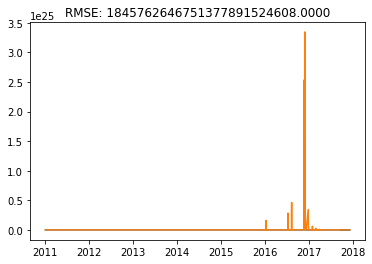

In [84]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))